# a03 Example - Continuous Scan

In [1]:
%load_ext autoreload
%autoreload 2

import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
import random

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Define a measure function

In [3]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices and adds a random component. Also adds a calculated value vsum.
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1_readout = devices.v1.voltage + random.gauss(mu=0, sigma=1)
    d.v2_readout = devices.v2.voltage + random.gauss(mu=0, sigma=1)

    d.vsum = d.v1_readout + d.v2_readout
    
    return d

## Experiments

### 1. 1D Scan with scan0 as ContinuousScan, using point data

In [4]:
# Set up the runinfo with scan0 as RepeatScan
runinfo = ps.RunInfo()

# Setting n_max ends the experiment after that number of iterations. To run continuously omit this parameter.
runinfo.scan0 = ps.ContinuousScan(n_max=100, dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

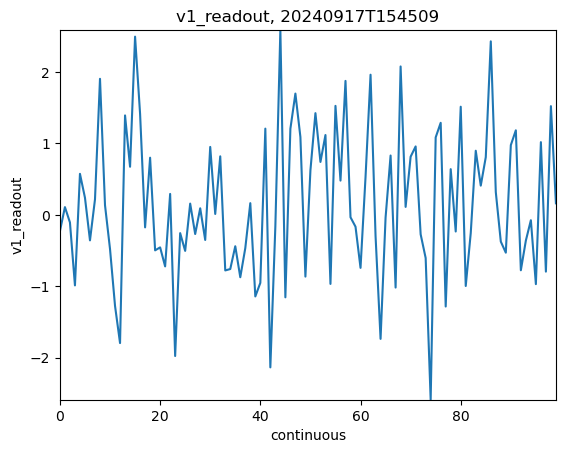

In [5]:
# implementing expt kill switch that can be called using ctrl+c to stop the expt
try:
    # 1D Plot using point data
    ps.live_plot1D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()

### 2. 2D Scan with scan1 as ContinuousScan, using point data

In [6]:
# Set up the runinfo with scan0 as PropertyScan and scan1 as RepeatScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 1, 10)}, prop='voltage', dt=0.01)

# Setting n_max ends the experiment after that number of iterations. To run continuously omit this parameter.
runinfo.scan1 = ps.ContinuousScan(n_max=20, dt=0.001)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

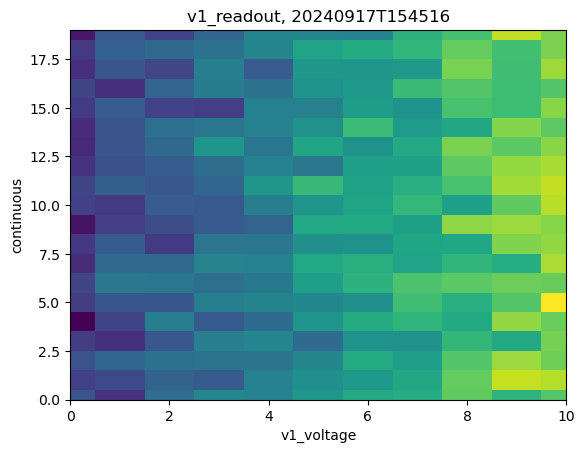

In [7]:
# implementing expt kill switch that can be called using ctrl+c to stop the expt
try:
    # 2D Plot using point data
    ps.live_plot2D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()

### 3. 2D Scan with scan0 as RepeatScan, scan1 as ContinuousScan, using point Data

In [8]:
# Set up the runinfo with scan0 as RepeatScan and scan1 as PropertyScan
runinfo = ps.RunInfo()
runinfo.scan0 = ps.RepeatScan(10, dt=0.005)

# Setting n_max ends the experiment after that number of iterations. To run continuously omit this parameter.
runinfo.scan1 = ps.ContinuousScan(n_max=50, dt=0.001)

runinfo.measure_function = get_voltage_data

expt = ps.Experiment(runinfo, devices)
expt.start_thread()

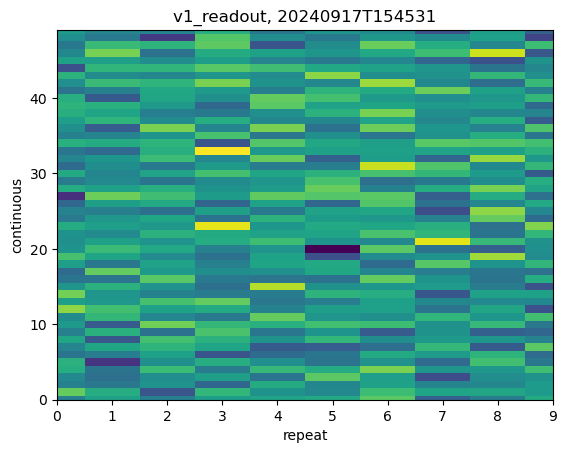

In [9]:
# implementing expt kill switch that can be called using ctrl+c to stop the expt
try:
    # 2D Plot using point data
    ps.live_plot2D(expt, data_name="v1_readout")
except KeyboardInterrupt:
    expt.stop()